In [62]:
import random
import nltk
nltk.download('omw-1.4')
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yashthakkar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
import pandas as pd

In [4]:
import numpy as np

In [17]:
df=pd.read_csv("movie_review.csv")
df.head()


,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [16]:
df.head()


(64720, 6)

In [12]:
import seaborn as sns

In [24]:
import re # library for regular expression␣

import string # for string operations
from nltk.corpus import stopwords # module for stop words that come␣

from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings
from nltk.stem import WordNetLemmatizer

In [30]:
all_positive_reviews=[]
for i in range(df["sent_id"].count()):
    if df.loc[i,"tag"]=="pos":
        all_positive_reviews.append(df.loc[i,"text"])


In [32]:
len(all_positive_reviews)

32937

In [33]:
all_negative_reviews=[]
for i in range(df["sent_id"].count()):
    if df.loc[i,"tag"]=="neg":
        all_negative_reviews.append(df.loc[i,"text"])

In [34]:
len(all_negative_reviews)

31783

<AxesSubplot:xlabel='tag', ylabel='count'>

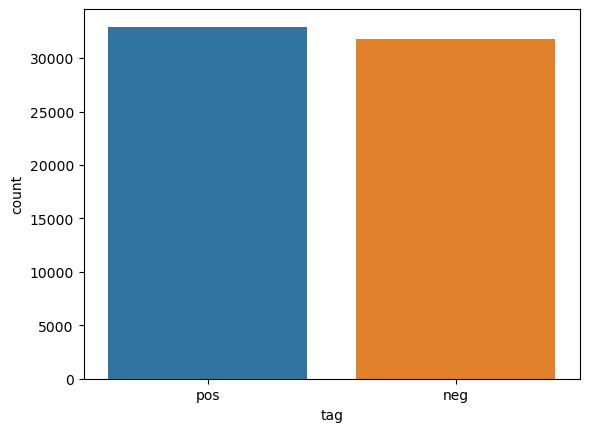

In [36]:
sns.countplot(x=df["tag"])

In [38]:
fig = plt.figure(figsize=(5, 5))
# labels for the two classes
labels = 'Positives', 'Negative'

<Figure size 500x500 with 0 Axes>

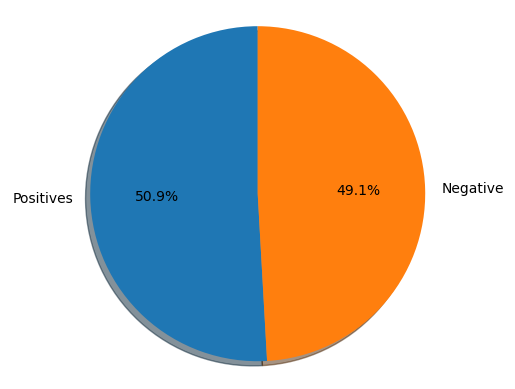

In [40]:
sizes = [len(all_positive_reviews), len(all_negative_reviews)]
# Declare pie chart, where the slices will be ordered and plotted␣

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
# Display the chart
plt.show()

In [43]:
# print positive in greeen
print('\033[92m' + all_positive_reviews[random.randint(0,3000)])
# print negative in red
print('\033[91m' + all_negative_reviews[random.randint(0,3000)])

no film in recent has left me with such conflicted feelings as neil jordan's harrowing , humorous , horrifying adaptation of patrick mccabe's novel about young lad francie brady's ( eamonn owens ) descent into madness in 1960s ireland .
it never does explain why his character has such superb martial arts skills . . . perhaps he was in the same cooking class as steven seagal in under siege ?


# Data preprocessing

In [44]:
# Our selected sample
review = all_positive_reviews[2277]
print(review)

jackson is funny as ever as ever ; in fact , his spirited line deliveries , especially when he first appears , are more than reminiscent of his work as jules in pulp fiction .


In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yashthakkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
 import re # library for regular expression␣

import string # for string operations
from nltk.corpus import stopwords # module for stop words that come␣

from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings
from nltk.stem import WordNetLemmatizer

# Remove hyperlinks

In [49]:
print('\033[92m' + review)
print('\033[94m')
# remove hyperlinks
review2 = re.sub(r'https?:\/\/.*[\r\n]*', '', review)
# remove hashtags
# only removing the hash # sign from the word
review2 = re.sub(r'#', '', review2)
print(review2)

jackson is funny as ever as ever ; in fact , his spirited line deliveries , especially when he first appears , are more than reminiscent of his work as jules in pulp fiction .

jackson is funny as ever as ever ; in fact , his spirited line deliveries , especially when he first appears , are more than reminiscent of his work as jules in pulp fiction .


In [50]:
print()
print('\033[92m' + review2)
print('\033[94m')
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False)
# tokenize tweets
tweet_tokens = tokenizer.tokenize(review2)
print()
print('Tokenized string:')
print(tweet_tokens)


jackson is funny as ever as ever ; in fact , his spirited line deliveries , especially when he first appears , are more than reminiscent of his work as jules in pulp fiction .


Tokenized string:
['jackson', 'is', 'funny', 'as', 'ever', 'as', 'ever', ';', 'in', 'fact', ',', 'his', 'spirited', 'line', 'deliveries', ',', 'especially', 'when', 'he', 'first', 'appears', ',', 'are', 'more', 'than', 'reminiscent', 'of', 'his', 'work', 'as', 'jules', 'in', 'pulp', 'fiction', '.']


In [51]:
stopwords_english = stopwords.words('english')
print('Stop words\n')
print(stopwords_english)
print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [53]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')
tweets_clean = []
for word in tweet_tokens: # Go through every word in your tokens list
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            tweets_clean.append(word)
print('removed stop words and punctuation:')
print(tweets_clean)



['jackson', 'is', 'funny', 'as', 'ever', 'as', 'ever', ';', 'in', 'fact', ',', 'his', 'spirited', 'line', 'deliveries', ',', 'especially', 'when', 'he', 'first', 'appears', ',', 'are', 'more', 'than', 'reminiscent', 'of', 'his', 'work', 'as', 'jules', 'in', 'pulp', 'fiction', '.']

removed stop words and punctuation:
['jackson', 'funny', 'ever', 'ever', 'fact', 'spirited', 'line', 'deliveries', 'especially', 'first', 'appears', 'reminiscent', 'work', 'jules', 'pulp', 'fiction']


# Stemming

In [54]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')
# Instantiate stemming class
stemmer = PorterStemmer()
# Create an empty list to store the stems
tweets_stem = []
for word in tweets_clean:
    stem_word = stemmer.stem(word) # stemming word
    tweets_stem.append(stem_word) # append to the list
print('stemmed words:')
print(tweets_stem)



['jackson', 'funny', 'ever', 'ever', 'fact', 'spirited', 'line', 'deliveries', 'especially', 'first', 'appears', 'reminiscent', 'work', 'jules', 'pulp', 'fiction']

stemmed words:
['jackson', 'funni', 'ever', 'ever', 'fact', 'spirit', 'line', 'deliveri', 'especi', 'first', 'appear', 'reminisc', 'work', 'jule', 'pulp', 'fiction']


In [56]:
words =['happier','happiness','happy','studying','study','studies','meeting']
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')
# Instantiate stemming class
stemmer = PorterStemmer()
# Create an empty list to store the stems
tweets_stem = []
for word in words:
    stem_word = stemmer.stem(word) # stemming word
    tweets_stem.append(stem_word) # append to the list
print('stemmed words:')
print(tweets_stem)



['jackson', 'funny', 'ever', 'ever', 'fact', 'spirited', 'line', 'deliveries', 'especially', 'first', 'appears', 'reminiscent', 'work', 'jules', 'pulp', 'fiction']

stemmed words:
['happier', 'happi', 'happi', 'studi', 'studi', 'studi', 'meet']


In [57]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yashthakkar/nltk_data...


True

In [64]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')
# Instantiate stemming class
wordnet_lemmatizer = WordNetLemmatizer()
# Create an empty list to store the stems
tweets_lem = []
for word in tweets_clean:
    lem_words = wordnet_lemmatizer.lemmatize(word)# stemming word
    tweets_lem.append(lem_words) # append to the list
print('lemmatized words:')
print(tweets_lem)



['jackson', 'funny', 'ever', 'ever', 'fact', 'spirited', 'line', 'deliveries', 'especially', 'first', 'appears', 'reminiscent', 'work', 'jules', 'pulp', 'fiction']

lemmatized words:
['jackson', 'funny', 'ever', 'ever', 'fact', 'spirited', 'line', 'delivery', 'especially', 'first', 'appears', 'reminiscent', 'work', 'jules', 'pulp', 'fiction']


In [65]:
 print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')
# Instantiate stemming class
wordnet_lemmatizer = WordNetLemmatizer()
# Create an empty list to store the stems
tweets_lem = []
for word in words:
    lem_words = wordnet_lemmatizer.lemmatize(word,pos ="v")# stemming word
    tweets_lem.append(lem_words) # append to the list
print('lemmatized words:')
print(tweets_lem)



['jackson', 'funny', 'ever', 'ever', 'fact', 'spirited', 'line', 'deliveries', 'especially', 'first', 'appears', 'reminiscent', 'work', 'jules', 'pulp', 'fiction']

lemmatized words:
['happier', 'happiness', 'happy', 'study', 'study', 'study', 'meet']
